# Transformada Wavelet

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, ricker

In [22]:
help(cwt)

Help on function cwt in module scipy.signal._wavelets:

cwt(data, wavelet, widths, dtype=None, **kwargs)
    Continuous wavelet transform.
    
    Performs a continuous wavelet transform on `data`,
    using the `wavelet` function. A CWT performs a convolution
    with `data` using the `wavelet` function, which is characterized
    by a width parameter and length parameter. The `wavelet` function
    is allowed to be complex.
    
    Parameters
    ----------
    data : (N,) ndarray
        data on which to perform the transform.
    wavelet : function
        Wavelet function, which should take 2 arguments.
        The first argument is the number of points that the returned vector
        will have (len(wavelet(length,width)) == length).
        The second is a width parameter, defining the size of the wavelet
        (e.g. standard deviation of a gaussian). See `ricker`, which
        satisfies these requirements.
    widths : (M,) sequence
        Widths to use for transform.
   

$$A * (1 - (x/a)**2) * exp(-0.5*(x/a)**2)$$

where $$A = 2/(sqrt(3*a)*(pi**0.25))$$.

In [12]:
help(ricker)

Help on function ricker in module scipy.signal._wavelets:

ricker(points, a)
    Return a Ricker wavelet, also known as the "Mexican hat wavelet".
    
    It models the function:
    
        ``A * (1 - (x/a)**2) * exp(-0.5*(x/a)**2)``,
    
    where ``A = 2/(sqrt(3*a)*(pi**0.25))``.
    
    Parameters
    ----------
    points : int
        Number of points in `vector`.
        Will be centered around 0.
    a : scalar
        Width parameter of the wavelet.
    
    Returns
    -------
    vector : (N,) ndarray
        Array of length `points` in shape of ricker curve.
    
    Examples
    --------
    >>> from scipy import signal
    >>> import matplotlib.pyplot as plt
    
    >>> points = 100
    >>> a = 4.0
    >>> vec2 = signal.ricker(points, a)
    >>> print(len(vec2))
    100
    >>> plt.plot(vec2)
    >>> plt.show()



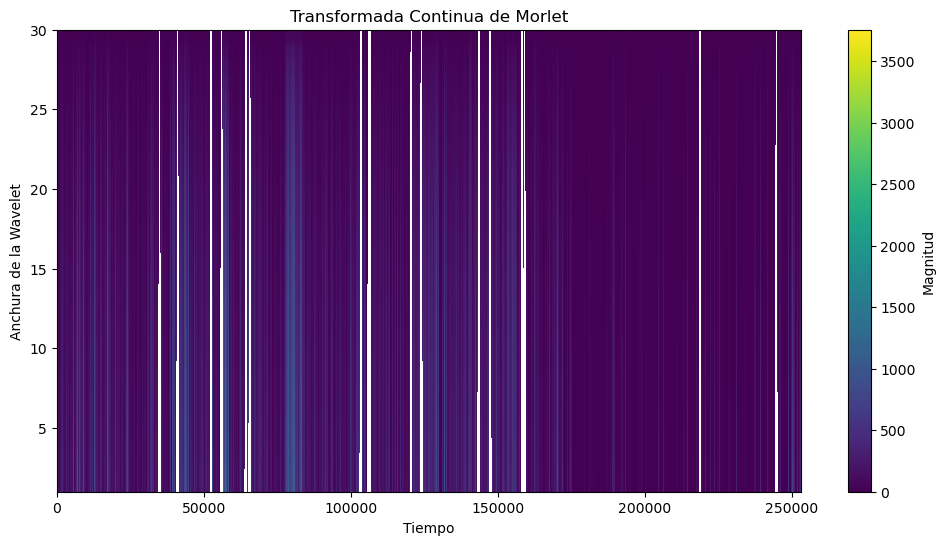

In [20]:
# Leer el archivo CSV con los datos originales
data = pd.read_csv('scaler_ALL_hourly_11abril.csv')

# Obtener la columna de interés (por ejemplo, 'ScalerCorr')
column_name = 'ScalerCorr'
data_column = data[column_name]

# Parámetros de la transformada continua de Morlet
widths = np.arange(1, 31)  # Anchuras de la wavelet (ajusta según tus necesidades)

# Aplicar la transformada continua de Morlet
#cwt_result = cwt(data_column, ricker, widths)
cwt_result = cwt(data_column, morlet, widths)
# Graficar la transformada continua de Morlet
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(cwt_result), aspect='auto', extent=[0, len(data_column), min(widths), max(widths)])
plt.title('Transformada Continua de Morlet')
plt.xlabel('Tiempo')
plt.ylabel('Anchura de la Wavelet')
plt.colorbar(label='Magnitud')
plt.savefig('morlet2.png')
plt.show()


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import morlet

# Leer el archivo CSV con los datos originales
data = pd.read_csv('scaler_ALL_hourly_11abril.csv')

# Obtener la columna de interés (por ejemplo, 'ScalerCorr')
column_name = 'ScalerCorr'
data_column = data[column_name]

# Definir los parámetros de la wavelet de Morlet
width = 5.0  # Ancho de la wavelet
scale = 1.0  # Factor de escala

# Aplicar la wavelet de Morlet a la columna de datos
wavelet_result = morlet(list(data_column), w=width, s=scale)

# Graficar la magnitud de la transformada
plt.figure(figsize=(12, 6))
plt.plot(list(data_column.index), np.abs(wavelet_result))
plt.title('Magnitud de la Transformada de Morlet')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud')
plt.show()


TypeError: 'list' object cannot be interpreted as an integer